<a href="https://colab.research.google.com/github/hyeonjun/AlphaZero/blob/master/4_3_Sarsa_Q_learning_maze_game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

정책 경사법은 게임 시부터 종료까지의 1 에피소드를 단위로 보상을 갱신함으로써 파라미터를 최적화하지만,
이번에 할 '가치 반복법'은 행동 1회 단위로 파라미터를 갱신한다.

# Sarsa Q 학습으로 미로 게임 풀기
정책 경사법은 성공할 때의 행동을 중시하여 정책을 최적화하는 방법이다. '가치 반복법'은 어떤 행동을 선택할 때 다음 상태 가치와 현재 상태의 가치의 차이를 계산하고, 그 차이만큼 현재 상태 가치를 증가시키는 방법이다.

미로 골인 지점의 매스에 코인이 쌓여 있는 것을 상상보면, 어떤 매스에서 다른 매스로 이동할 때 만약 이동 후의 목적지에 코인이 쌓여 있다면 그 중 약간의 코인을 받아 이동하기 전의 위치에 쌓는다. 이를 반복하면 언젠가는 골인 지점부터 시작 지점의 매스까지 코인이 이어지는 길이 만들어진다.

가치 반복법을 이용한 알고리즘이 'Sarsa'와 Q 학습이다.

Sarsa 수렴이 느려지만 국소적인 해답에 갇히지 않고, Q 학습은 수렴은 빠른 반면 국소적인 해답에 갇히기 쉽다.

* Sarsa Q 학습을 활용한 미로 게임의 강화 학습 요소

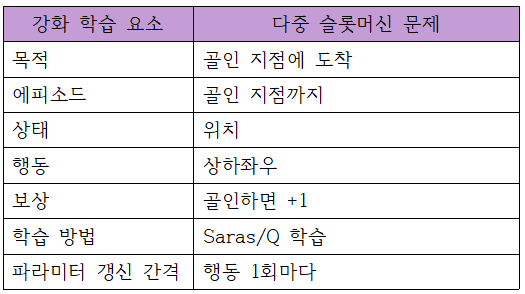


* Sarsa와 Q 학습을 활용한 미로 게임의 강화 학습 사이클

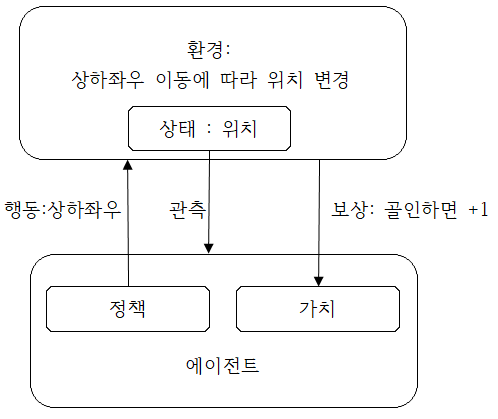

# 수익과 할인 보상 합계

강화 학습은 즉시 보상뿐만 아니라, 미래에 발생하는 모든 지연 보상을 포함한 보상 합계를 최대화하는 것을 목표로 한다. 이것을 '수익'이라고 부른다.

* 수익의 계산식

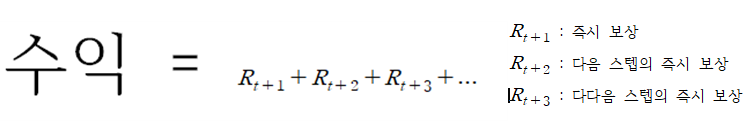


보상은 환경에서 얻는 것에 비해 수익은 최대화하고자 하는 목표로서 에이전트가 스스로 설정한다. 때문에 에이전의 사고방식에 따라 수익 계산식이 달라진다.

예를 들어, 더욱 먼 미래의 보상을 할인한 보상 합계인 '할인 보상 합계'는 수익 계산에 자주 사용된다.

* 할인 보상 합계의 계산식

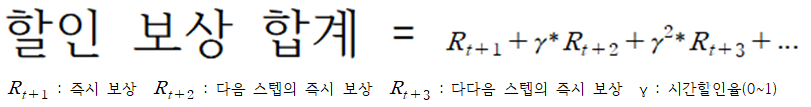

# 행동 가치 함수와 상태 가치 함수
수익은 아직 발생하지 않은, 미래에 일어날 가능성이 있는 일을 포함한 확정되지 않은 값이기 때문에 에이전트의 상태와 정책을 고정한 뒤 조건부로 수익을 계산한다. 이를 '가치'라고 부른다. 가치가 크게 되는 조건을 찾아내면 학습이 되었다고 간주.

이 가치를 계산하는 함수에는 '행동 가치 함수'와 '상태 가치 함수'가 있다.

매스 0이 시작, 매스 8이 목표. 골인 지점에 다다랐을 때 보상 1을 받도록 함.

* 행동 가치 함수(action value function)

특정한 상태에서 특정한 행동을 선택하는 가치를 계산하는 함수.
행동 가치 함부는 기호 Q로 표시하므로 'Q 함수'라 부른다. 또한, Q 학습의 행동 가치 함수만을 Q 함수라고 부르는 것은 아니다.

에이전트가 매스 5에 있다고 가정하면, 행동 '하(아래)'를 선택하면 골인 지점에 도착하고 보상 1을 받을 수 있을 때 이를 식으로 표현하면 다음과 같다.

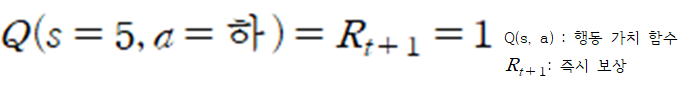

에이전트가 매스 5에 있으니, 이번에는 행동 '좌'를 선택하면 매스 4로 이동해 골인 지점에서 멀어진다. 여기에서 골인 지점에 도착하기 위해서는 '5->4->5->8'과 같이 2개의 스텝을 밟기 위한 시간이 필요하다. 때문에 '시간 할인율'에 따라 보상이 할인된다.

이를 수식으로 표현하면 아래와 같다.

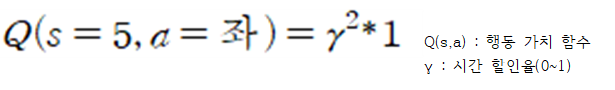

에이전트가 매스 4에 있으니, 이 위치에서 골인 지점에 이르기 위해서는 '4->5->8'로 이동해야 한다. 이를 수식으로 표현하면 아래와 같다.

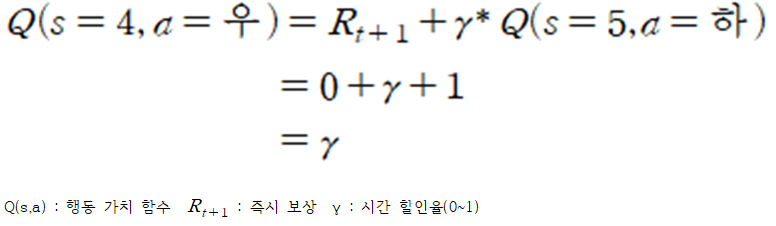

* 상태 가치 함수(state value function)

특정 상태의 가치를 계산하는 함수다. 상태 가치 함수는 기호 V로 표현한다.
에이전트가 매스 5에 있다고 가정해 본다. 행동 '하'를 선택하면 골인 지점에 도착하고 보상 1을 받을 수 있다. 이를 식으로 표현하면 아래와 같다.

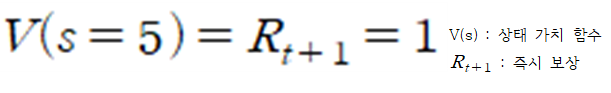

에이전트가 매스 4에 있다고 가정해 본다. 이 위치에서 골인 지점에 이르기 위해서는 '4->5->8'로 이동해야 한다. 이를 수식으로 표현하면 다음과 같다.

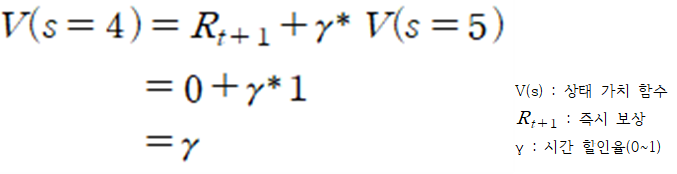



# 벨만 방정식과 마르코프 결정 과정
위에서 설명한 행동 가치 함수와 상태 가치 함수의 수식을 일반적인 형태로 바꾸어 쓰면 아래 식과 같고, 이것을 벨만 방정식(Bellman equation)이라고 부른다.

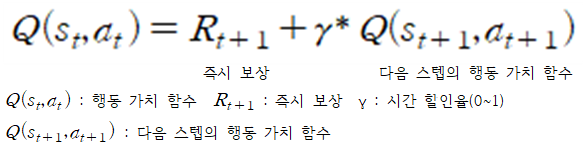

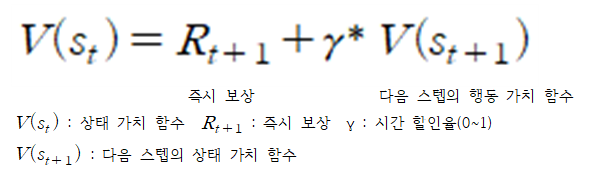

이 벨만 방정식이 성립하기 위해서는 환경이 마르코프 결정 과정(Markov Decision Process)을 따라야만한다. 마르코프 결정 과정은 다음 상태가 현재 상태에서 선택한 행동에 따라 확정되는 시스템을 의미한다. 벨만 방정식으로부터 행동 가치 함수를 학습하는 방법으로 Sarsa, Q 학습 등이 있다. 상태 가치 함수로는 'Dueling Network', A2A(Advantage Actor Critic) 등의 학습 알고리즘을 사용하지도 한다.




# 가치 반복법 학습 순서
학습하면서 행동 가치 함수 최적화!

1. 랜덤 행동 준비
2. 행동 가치 함수 준비
3. 행동에 따라 다음 상태 얻기
4. 랜덤 또는 행동 가치 함수에 따라 행동 얻기
5. 행동 가치 함수 갱신
6. 골인 지점에 이를 때까지 3~5단계 반복
7. 에피소드 3~6을 반복하며 학습

행동 가치 함수가 충분히 학습되지 않은 상태에서 행동 가치 함수만으로 행동을 계속 선택하면 아직 발견하지 못한 더 좋은 선택에 간과하게 될 가능성이 있다. 때문에 확률 ε(0이상 1이하의 실수)에 따라 무작위로 행동하고, 확률 (1-ε)으로 행동 가치 함수에 따른 행동을 선택한다.

이것은 ε-greedy 방법이다.

In [ ]:
# import package
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

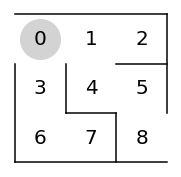

In [ ]:
# 미로 생성
fig = plt.figure(figsize = (3,3))

# 벽
plt.plot([0,3], [3,3], color='k')
plt.plot([0,3], [0,0], color='k')
plt.plot([0,0], [0,2], color='k')
plt.plot([3,3], [1,3], color='k')
plt.plot([1,1], [1,2], color='k')
plt.plot([2,3], [2,2], color='k')
plt.plot([2,1], [1,1], color='k')
plt.plot([2,2], [0,1], color='k')

# 숫자
for i in range(3):
  for j in range(3):
    plt.text(0.5 + i, 2.5 - j, str(i+j*3), size=20, ha='center', va='center')

# 원
circle, = plt.plot([0.5],[2.5], marker='o', color='#d3d3d3', markersize=40)

# 눈금 및 배경 숨김
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=False, right=False, left=False, labelleft=False)
plt.box(False)

# 랜덤 행동 준비
랜덤한 행동은 정책 경사법과 같이 파라미터 θ, 정책을 생성하고, np.random.choice()로 분산을 추가해 생성한다. 단, 정책 경사법과 달리 파라미터 θ, 정색은 갱신하지 않음.

In [ ]:
# 파라미터 θ의 초기값 준비
theta_0 = np.array([
                    [np.nan, 1, 1, np.nan], # 0 상, 우, 하, 좌
                    [np.nan, 1,1,1], # 1
                    [np.nan, np.nan, np.nan, 1], # 2
                    [1, np.nan, 1, np.nan], # 3
                    [1, 1, np.nan, np.nan], # 4
                    [np.nan, np.nan, 1,1], # 5
                    [1, 1, np.nan, np.nan], # 6
                    [np.nan, np.nan, np.nan, 1] # 7
                    ])

In [ ]:
# 파라미터 θ를 정책으로 변환
def get_pi(theta):
  # 비율 계산
  [m, n] = theta.shape
  pi = np.zeros((m,n))
  for i in range(0, m):
    pi[i,:] = theta[i,:] / np.nansum(theta[i,:])
  pi = np.nan_to_num(pi)
  return pi

In [ ]:
pi_0 = get_pi(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.33333333 0.33333333 0.33333333]
 [0.         0.         0.         1.        ]
 [0.5        0.         0.5        0.        ]
 [0.5        0.5        0.         0.        ]
 [0.         0.         0.5        0.5       ]
 [0.5        0.5        0.         0.        ]
 [0.         0.         0.         1.        ]]


In [ ]:
# 행동에 따라 다음 상태 얻기
def get_s_next(s, a):
  if a == 0: # 상
    return s-3
  elif a == 1: # 우
    return s+1
  elif a == 2: # 하
    return s+3
  elif a == 3: # 좌
    return s-1

In [ ]:
# 행동 가치 함수 준비
# 행동 가치 함수를 표현식으로 준비.
# 학습 전에는 올바른 행동 가치 함수를 알 수 없으므로 이동 가능한 방향은 난수, 이동 불가능한 방향은 'np.nan(Numpy의 결손값)'으로 초기화.
[a,b] = theta_0.shape
Q = np.random.rand(a,b) * theta_0
print(Q)

[[       nan 0.23885167 0.87426869        nan]
 [       nan 0.42004052 0.57274299 0.08775842]
 [       nan        nan        nan 0.92438511]
 [0.64993187        nan 0.58290829        nan]
 [0.3808041  0.72718572        nan        nan]
 [       nan        nan 0.80559625 0.22497868]
 [0.60587673 0.25351513        nan        nan]
 [       nan        nan        nan 0.24123452]]


In [ ]:
# 랜덤 또는 행동 가치 함수에 따라 행동 얻기
# 확률 ε(0이상 1이하의 실수)으로 랜덤하게 행동을 선택하고, 확률 (1-ε)에 따라 행동 가치 함수에서의 행동을 선택한다.
# nanargmax()는 np.nan 이외의 최댓값을 얻는 함수. 이를 활용해 행동 가치 함수에서 기대값이 높은 행동을 선택해 간다.
def get_a(s, Q, epsilon, pi_0):
  if np.random.rand() < epsilon:
    # 랜덤으로 행동 선택
    return np.random.choice([0,1,2,3], p=pi_0[s])
  else:
    # 행동 가치 함수로 행동 선택
    return np.nanargmax(Q[s])

# Sarsa 통한 행동 가치 함수 갱신
정책은 현재 상태에 따라 다음 행동을 결정하는 전략이다. Sarsa 정책은 확률 ε으로 랜덤하게 행동을 선택하게 하고, 확률(1-ε)으로 행동 가치 함수에 따라 행동을 선택한다. 행동 가치 함수를 업데이트함으로써 Sarsa 정책을 갱신한다.

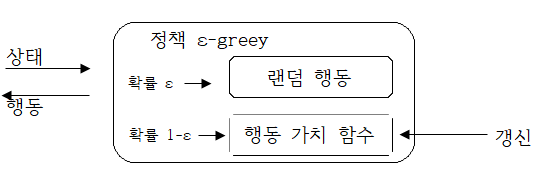

Sarsa에서 행동 가치 함수를 갱신하는 계산식은 다음과 같다. 파라미터 θ에 학습률과 TD 오차를 곱해서 그 값을 더한다.

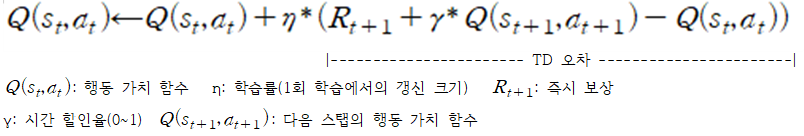

TD(Temporal Diffence) 오차란 행동 전의 평갓값과 행동 후의 평갓값의 차이를 의미한다. 최적화를 통해 TD 오차를 0에 가깝게 줄임으로써 행동 전과 행동 후의 평갓값이 일치하게 되면 행동에 대한 보상을 정확하게 예측할 수 있다. 이 정확한 예측을 기반으로 가장 큰 보상을 받을 수 있는 행동을 선택함으로써 가장 큰 수입이 기대되는 일련의 행동을 할 수 있다.

In [ ]:
# Sarsa 따른 행동 가치 함수 갱신
def sarsa(s, a, r, s_next, a_next, Q):
  eta = 0.1 # 학습 계수
  gamma = 0.9 # 시간 할인율

  if s_next == 8: # 골인 지점에는 다음 스텝이 존재하지 않으므로
    Q[s, a] = Q[s, a] + eta * (r - Q[s, a])
  else:
    Q[s, a] = Q[s, a] + eta * (r + gamma * Q[s_next, a_next] - Q[s, a])
  return Q

# Q 학습을 통한 행동 가치 함수 갱신
Q 학습에서의 정책은 행동 가치 함수 갱신을 위해 사용되는 계산식을 제외하고는 Sarsa 같다.

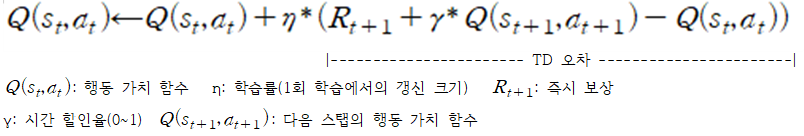

Sarsa는 행동 가치 함수를 갱신할 때 '다음 스텝의 행동'을 사용하며, 다음 스텝의 행동을 계산할 때 ε-greedy 에 따른 무작위성을 포함한다. Q 학습에서는 행동 가치 함수를 갱신할 때, '다음 스텝의 최대 가치 행동'을 선택하는데 ε-greedy에 따른 무작위성을 포함하지 않는다.

때문에 Sarsa와 비교해서 Q 학습 쪽이 빠르게 수렵하지만, 국소적인 정답에 갇히기 쉬는 것이다.

In [ ]:
# Q 학습에 따른 행동 가치 함수 갱신
def q_learning(s, a, r, s_next, a_next, Q):
  eta = 0.1 # 학습 계수
  gamma = 0.9 # 시간 할인율

  if s_next == 8: # 골인 지점에서는 다음 스탭이 존재 X
    Q[s, a] = Q[s, a] + eta * (r - Q[s,a])
  else:
    Q[s, a] = Q[s, a] + eta * (r + gamma * np.nanargmax(Q[s_next, :]) - Q[s,a])
  return Q
  

In [ ]:
# 1 에피소드 실행
# 1 에피소드를 실행해서 이력과 행동 가치 함수를 얻는다. 이력은 [상태, 행동] 리스트다.
# Sarsa 가 아니라 Q학습으로 실행하고자 하는 경우에는 sarsa()를 q_learning()으로 변경한다.
def play(Q, epsilon, pi):
  s = 0 # 상태
  a = a_next = get_a(s, Q, epsilon, pi) # 행동 초깃값
  s_a_history = [[0,np.nan]] # 상태와 행동 이력

  # 에피소드 완료 시까지 반복
  while True:
    # 행동에 따른 다음 상태 얻기
    a = a_next
    s_next = get_s_next(s,a)

    # 이력 갱신
    s_a_history[-1][1] = a
    s_a_history.append([s_next, np.nan])

    # 종료 판정
    if s_next == 8:
      r = 1
      a_next = np.nan
    else:
      r = 0
      # 행동 가치 함수 Q에 따라 행동하기
      a_next = get_a(s_next, Q, epsilon, pi)
    
    # 행동가치함수 갱신(Q학습시에는 q_leaniing()으로 변경)
    Q = sarsa(s, a, r, s_next, a_next, Q)
    # Q = q_learning(s, a, r, s_next, Q)

    # 종료 판정
    if s_next == 8:
      break
    else:
      s = s_next

  # 이력과 행동 가치 함수 반환
  return [s_a_history, Q]


In [ ]:
# ε-greedy 값을 조금씩 줄이기
# ε-greedy의 초기값은 0.5이며, 에피소드가 진행될 때마다 'epsilon = epsilon / 2'로 점점 줄여간다.
epsilon = 0.5 # ε-greedy에서의 ε 초기값

# 에피소드를 반복해서 실행하며 학습
for episode in range(10):
  # ε-greed 값을 점점 감소시킴
  epsilon = epsilon / 2

  # 1 에피소드를 실행해 이력과 행동 가치 함수 얻기
  [s_a_history, Q] = play(Q, epsilon, pi_0)

  # 출력
  print('에피소드: {}, 스텝 : {}'.format(episode, len(s_a_history)-1))

에피소드: 0, 스텝 : 34
에피소드: 1, 스텝 : 118
에피소드: 2, 스텝 : 36
에피소드: 3, 스텝 : 114
에피소드: 4, 스텝 : 4
에피소드: 5, 스텝 : 4
에피소드: 6, 스텝 : 4
에피소드: 7, 스텝 : 4
에피소드: 8, 스텝 : 4
에피소드: 9, 스텝 : 4


In [ ]:
# 가치의 경우 최초에는 매스 8 주변에만 있지만, 학습이 진행됨에 따라 출발 지점으로 향하는 경로의 가치가 높아지는 것을 볼 수 있음

# 애니메이션 정기 처리 수행 함수
def animate(i):
  state = s_a_history[i][0]
  circle.set_data((state % 3) + 0.5, 2.5 - int(state / 3))
  return circle

# 애니메이션 표시
anim = animation.FuncAnimation(fig, animate, frames=len(s_a_history), interval=200, repeat=True)
HTML(anim.to_jshtml())